In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')


# 1.문제 정의 및 데이터 선정
예측모델링으로 풀고자 하는 문제를 정의
* 왜 이 문제를 풀어야 하는지 강조하고 어떤 데이터를 사용할 것인지 설명
* 실제 데이터를 사용할 수 없는 경우 시뮬레이션 데이터 or Public 데이터 (실제데이터와 유사한)도 OK

### 데이터 불러오기

이 데이터 세트는 7개의 열이 있는 28,242개의 항목으로 구성되어 있습니다. 열은 여러 국가의 농업 생산 및 환경 요인과 관련된 다양한 특징을 나타냅니다("면적"이라고 함). 다음은 열에 대한 개요입니다.

* 지역(국가): 이 열에는 다양한 국가 또는 지역을 나타내는 범주형 데이터가 들어 있습니다. 누락된 값이 없는 객체 유형입니다.

* 항목: 이 열은 농산물의 유형을 나열하며, 객체로 저장됩니다. 여기의 데이터는 어떤 작물이나 항목이 분석되고 있는지를 나타냅니다.

* 연도: 데이터가 기록된 연도를 나타내는 정수 열입니다. 여러 연도를 포괄하며 시간 경과에 따른 변화를 추적합니다.

* hg/ha_yield: 이 열에는 헥타르당 헥토그램(hg/ha)으로 작물 수확량을 나타내는 정수 데이터가 들어 있습니다. 이는 농업 생산성의 핵심 성과 지표입니다.

* average_rain_fall_mm_per_year: 이는 각 국가의 연평균 강수량을 밀리미터 단위로 측정하는 플로트 열입니다. 강수량은 작물 수확량에 영향을 미치는 중요한 요소입니다.

* pesticides_tonnes: 톤 단위로 측정한 살충제 사용량을 나타내는 플로트 열입니다. 살충제 사용은 작물 수확량에 영향을 미칠 수 있지만 과도한 사용은 환경 및 건강에 영향을 미칠 수 있습니다.

* avg_temp: 이 열에는 해당 연도의 국가 평균 기온을 섭씨로 나타낸 float 데이터가 들어 있습니다. 기온은 농업 생산성에 영향을 미치는 또 다른 중요한 요소입니다.

    [캐글 데이터 링크](https://www.kaggle.com/datasets/mrigaankjaswal/crop-yield-prediction-dataset/data)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/고급통계/과제 1/yield_df.csv")
df = df.iloc[:,1:]
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# 2. 탐색적 데이터 분석: 데이터 분포, scale, 등

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df['Area'].nunique()

101

In [ ]:
df['Item'].nunique()

10

In [ ]:
cols = df.select_dtypes(include='object').columns

df[cols].describe()

,Area,Item
count,28242,28242
unique,101,10
top,India,Potatoes
freq,4048,4276


Labeling

In [ ]:
from sklearn.preprocessing import LabelEncoder

df1 = df.copy()
encoder = LabelEncoder()
df1['Area'] = encoder.fit_transform(df1['Area'])
df1['Item'] = encoder.fit_transform(df1['Item'])

In [ ]:
df.isnull().sum()

,0
Area,0
Item,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0


**시각화**

In [ ]:
# 데이터 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

sns.pairplot을 이용하여 설명변수의 분포(히스토그램) 및 설명변수들 간의 관계(산점도)를 그리고, 특성을 파악

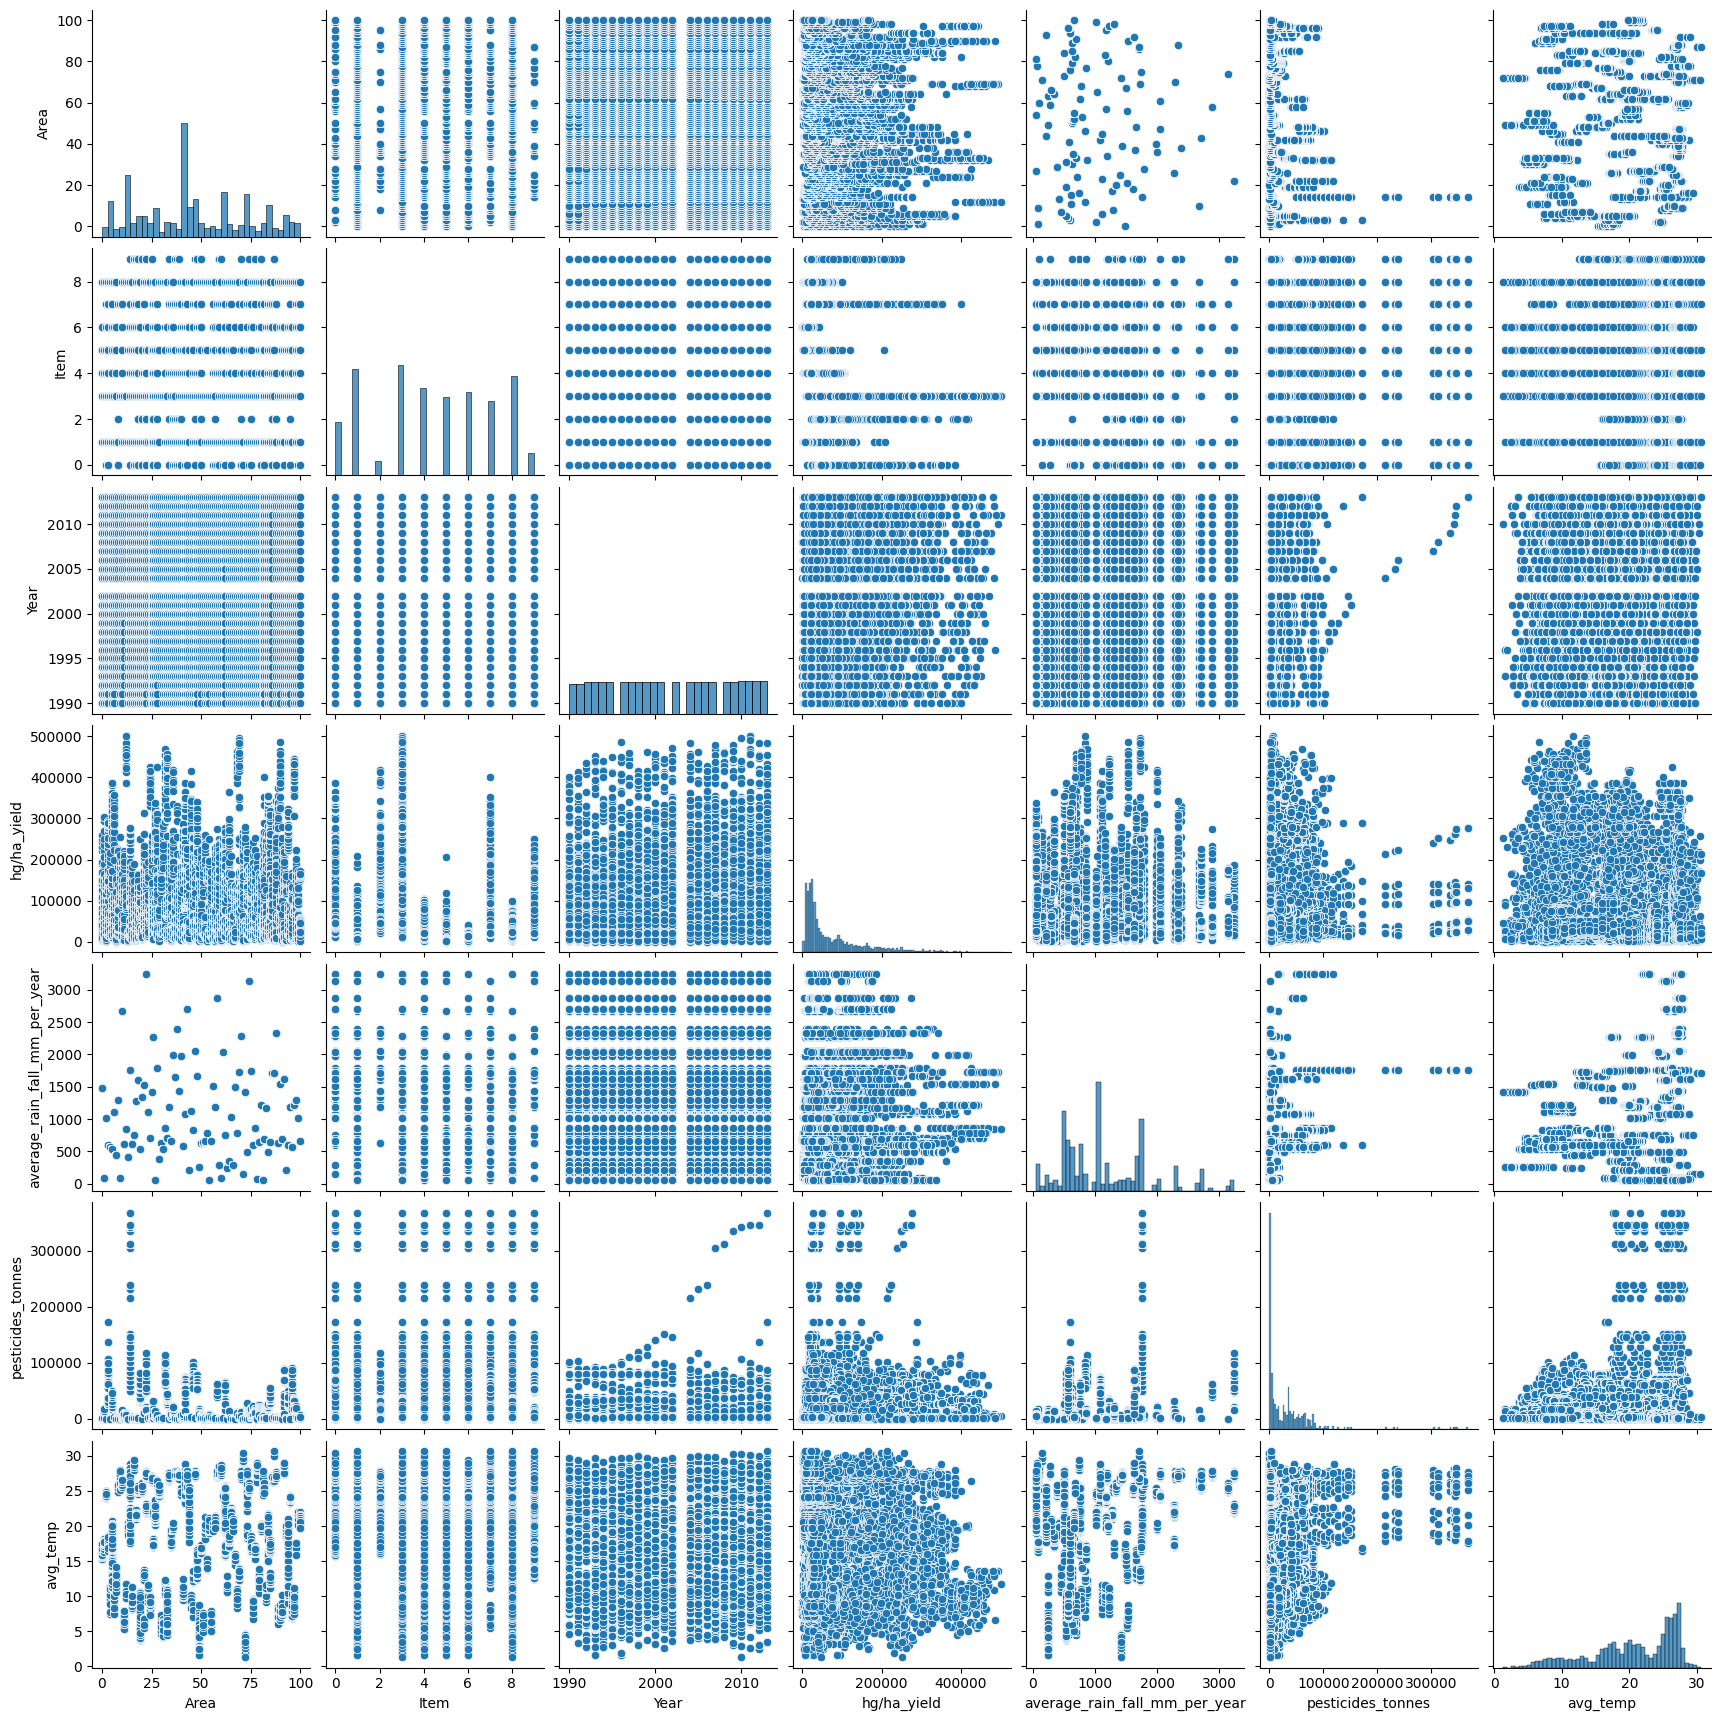

In [ ]:
sns.pairplot(df1)
plt.show();

In [ ]:
df.shape

(28242, 7)

In [ ]:
X = df1.copy().drop('hg/ha_yield',axis=1)
y = df1['hg/ha_yield']
X.shape, y.shape

((28242, 6), (28242,))

In [ ]:
X.corr()

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area,1.000000,0.003169,0.003421,-0.233549,-0.313573,-0.045739
Item,0.003169,1.000000,0.001465,-0.062580,0.048070,-0.078257
Year,0.003421,0.001465,1.000000,-0.003798,0.140930,0.014409
average_rain_fall_mm_per_year,-0.233549,-0.062580,-0.003798,1.000000,0.180984,0.313040
pesticides_tonnes,-0.313573,0.048070,0.140930,0.180984,1.000000,0.030946
avg_temp,-0.045739,-0.078257,0.014409,0.313040,0.030946,1.000000


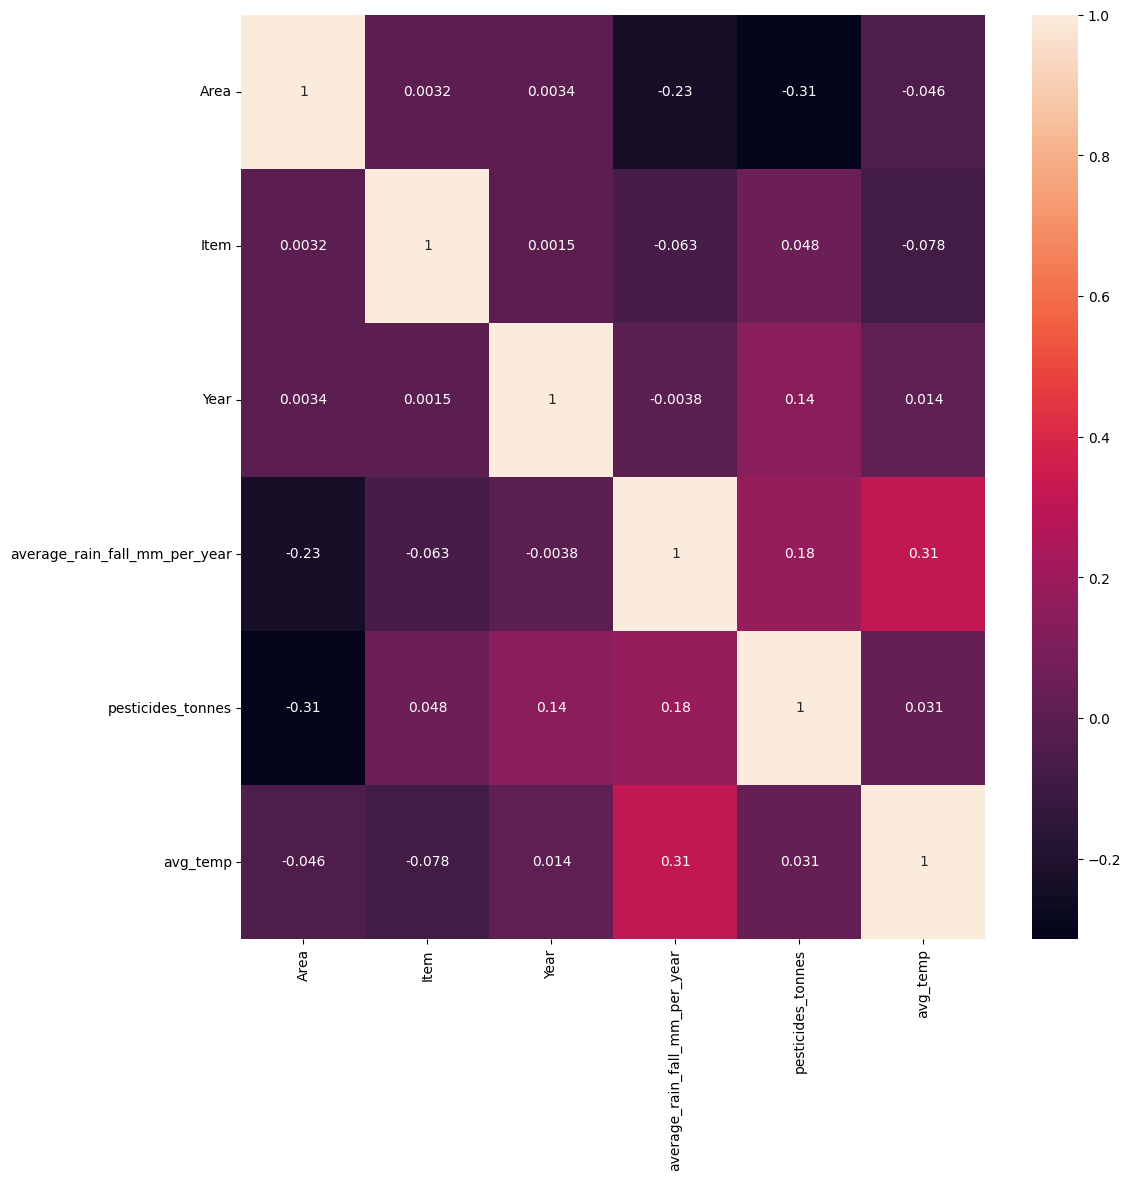

In [ ]:
plt.figure(figsize=(12, 12))
sns.heatmap(X.corr(), annot=X.corr())
plt.show()

# 3. 데이터 전처리: 정규화, 변수선택 등

In [ ]:
df = pd.get_dummies(df)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 116 entries, Year to Item_Yams
dtypes: bool(111), float64(3), int64(2)
memory usage: 4.1 MB


In [ ]:
df.isnull().sum()

,0
Year,0
hg/ha_yield,0
average_rain_fall_mm_per_year,0
pesticides_tonnes,0
avg_temp,0
...,...
Item_Sorghum,0
Item_Soybeans,0
Item_Sweet potatoes,0
Item_Wheat,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

Min-Max Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_m = scaler.fit_transform(X_train)
X_test_m = scaler.transform(X_test)

# 4. 예측모델링: 모델 적용 및 학습
* 수업시간에 학습한 모델은 반드시 포함(단, 회귀문제라면 로지스틱은 적용 안해도 됨)
* 수업시간에 학습하지 않은 모델 적용해도 OK

**LinearRegression**


1. 정규화X

In [ ]:
from sklearn.linear_model import LinearRegression
# 모델 구축
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 예측
lr_train= lr.predict(X_train)
lr_test = lr.predict(X_test)

print(lr_test)

[ 95206.02035279  43756.97675549  90710.57817012 ...  96635.71467353
 122408.29404033  78459.18079068]


2. StandardScaler

In [ ]:
from sklearn.linear_model import LinearRegression
# 모델 구축
lr_s = LinearRegression()
lr_s.fit(X_train_s, y_train)

LinearRegression()

In [ ]:
# 예측
lr_train_s = lr_s.predict(X_train_s)
lr_test_s = lr_s.predict(X_test_s)

print(lr_test_s)

[ 95206.02035292  43756.97675549  90710.57817024 ...  96635.71467356
 122408.29404037  78459.18079074]


3. Min-Max Scaler

In [ ]:
from sklearn.linear_model import LinearRegression
# 모델 구축
lr_m = LinearRegression()
lr_m.fit(X_train_m, y_train)

LinearRegression()

In [ ]:
# 예측
lr_train_m = lr_m.predict(X_train_m)
lr_test_m = lr_m.predict(X_test_m)

print(lr_test_m)

[ 95206.02035292  43756.97675549  90710.57817024 ...  96635.71467356
 122408.29404037  78459.18079074]


**statsmodels의 OLS를 사용하여 선형회귀분석 시행**
(OLS: Ordinary Least Squares)

 - OLS: 가장 기본적인 결정론적 선형 회귀 방법으로 잔차제곱합(RSS: Residual Sum of Squares)를 최소화하는 가중치(β1, β2 ...) 구하는 방법
 - 모델 선언: model = sm.OLS(Y데이터, X데이터)   
 - 모델 학습: model_trained = model.fit()

In [ ]:
# 기계학습 모델 구축 및 평가 패키지
import scipy as sp
import scipy.stats as stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
model = sm.OLS(y, X)
model = model.fit()

1. 정규화X

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y, X)
model = model.fit()

In [ ]:
model = sm.OLS(y, X)

In [ ]:
model = model.fit()

In [ ]:
# 예측
ols_train= model.predict(X_train)
ols_test = model.predict(X_test)

print(ols_test)

25564     90181.930698
18113     48148.832827
25607     83740.293301
6815      83720.815307
18144     56259.397383
             ...      
25027     49664.749325
5508      96027.716227
11393    103426.523791
16688    122741.439407
3877      78732.438111
Length: 5649, dtype: float64


2. Standard Scaler

In [ ]:

model_s = sm.OLS(y_train, X_train_s)

In [ ]:
model_s = model_s.fit()

In [ ]:

# 예측
ols_train_s= model_s.predict(X_train_s)
ols_test_s = model_s.predict(X_test_s)

print(ols_test_s)

[ 18154.82259255 -33294.22100488  13659.38040987 ...  19584.51691319
  45357.09628      1407.98303037]


3. Min-Max Scaler

In [ ]:

model_m = sm.OLS(y_train, X_train_m)

In [ ]:
model_m = model_m.fit()

In [ ]:
# 예측
ols_train_m= model_m.predict(X_train_m)
ols_test_m = model_m.predict(X_test_m)

print(ols_test_m)

[101472.87804042  49968.0966877  101606.88999752 ...  76502.04964633
  92749.37698311  98963.81970183]


**분산분석 (ANOVA: Analysis of Variance) 시행**

- 종속변수의 분산과 독립변수의 분산간의 관계를 사용하여 선형회귀분석의 성능을 평가   

In [ ]:
data = df1.copy()
data['hg_ha_yield'] = data['hg/ha_yield']
data = data.drop('hg/ha_yield',axis=1)

In [ ]:
data

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams,hg_ha_yield
0,1990,1485.0,121.00,16.37,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,36613
1,1990,1485.0,121.00,16.37,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,66667
2,1990,1485.0,121.00,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,23333
3,1990,1485.0,121.00,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,12500
4,1990,1485.0,121.00,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,2013,657.0,2550.07,19.76,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,22581
28238,2013,657.0,2550.07,19.76,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,3066
28239,2013,657.0,2550.07,19.76,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,13142
28240,2013,657.0,2550.07,19.76,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,22222


In [ ]:
df

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,36613,1485.0,121.00,16.37,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1990,66667,1485.0,121.00,16.37,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,1990,23333,1485.0,121.00,16.37,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,1990,12500,1485.0,121.00,16.37,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1990,7000,1485.0,121.00,16.37,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28237,2013,22581,657.0,2550.07,19.76,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
28238,2013,3066,657.0,2550.07,19.76,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
28239,2013,13142,657.0,2550.07,19.76,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
28240,2013,22222,657.0,2550.07,19.76,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
model_2 = ols('hg_ha_yield ~ Area + Item + Year + average_rain_fall_mm_per_year + pesticides_tonnes + avg_temp', data=data)
model_2_trained = model_2.fit()

In [ ]:
display(model_2_trained.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            hg_ha_yield   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     424.3
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        02:15:21   Log-Likelihood:            -3.5940e+05
No. Observations:               28242   AIC:                         7.188e+05
Df Residuals:                   28235   BIC:                         7.189e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -1.881e+06   1.39e+05    -13.533      0.000   -2.15e+06   -1.61e+06
Area                             92.6313     19.395      4.776      0.000      54.617     130.646
Item                          -7688.0394    184.793    -41.604      0.000   -8050.242   -7325.837
Year                           1009.2439     69.479     14.526      0.000     873.061    1145.426
average_rain_fall_mm_per_year     2.9772      0.745      3.999      0.000       1.518       4.437
pesticides_tonnes                 0.1032      0.009     11.891      0.000       0.086       0.120
avg_temp                      -1929.4205     80.991    -23.823      0.000   -2088.167   -1770.674
==============================================================================
Omnibus:                     7796.832   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17975.231
Skew:                           1.577   Prob(JB):                         0.00
Kurtosis:                       5.307   Cond. No.                     2.02e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sm.stats.anova_lm(model_2_trained)

,df,sum_sq,mean_sq,F,PR(>F)
Area,1.0,9.073176e+09,9.073176e+09,1.370128,2.417998e-01
Item,1.0,1.033053e+13,1.033053e+13,1559.999249,0.000000e+00
Year,1.0,1.722803e+12,1.722803e+12,260.158072,2.888834e-58
average_rain_fall_mm_per_year,1.0,2.683526e+10,2.683526e+10,4.052356,4.411923e-02
pesticides_tonnes,1.0,1.009479e+12,1.009479e+12,152.440049,6.249629e-35
avg_temp,1.0,3.758181e+12,3.758181e+12,567.517795,3.278926e-124
Residual,28235.0,1.869761e+14,6.622138e+09,NaN,NaN


**Multilayer Perceptron 모델링**

<b>activation</b> - activation function 타입 (identity, logistic, tanh, <font color='red'>relu</font>) <br>
<b>alpha     </b> - L2 regularization term parameter (과적합 방지용) <br>
<b>batch_size</b> - stochastic optimizer가 사용할 minibatch 크기 <br>
<b>max_iter  </b> - stochastic optimizer의 최대 iteration 횟수<br>
<b>solver    </b> - stochastic optimizer 종류 (<font color='red'>adam</font>, sgd, lbfgs) <br>

In [ ]:
''' Neural Network Regressor 모듈 '''
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(activation='relu', alpha=1E-3, batch_size=25,
                       hidden_layer_sizes=(50, 25), max_iter=1000, learning_rate_init=0.001,
                       solver='adam', verbose=10)



1. 정규화X

In [ ]:
mlp.fit(X_train, y_train)
# 예측
mlp_train= mlp.predict(X_train)
mlp_test = mlp.predict(X_test)

print(mlp_test)

Iteration 1, loss = 4212035695.14206886
Iteration 2, loss = 3581765997.30060530
Iteration 3, loss = 3553635728.73775196
Iteration 4, loss = 3541204402.44701815
Iteration 5, loss = 3537062686.58425951
Iteration 6, loss = 3529243588.43866205
Iteration 7, loss = 3519145694.59791613
Iteration 8, loss = 3516968498.77801704
Iteration 9, loss = 3514049248.28632498
Iteration 10, loss = 3512959550.55730152
Iteration 11, loss = 3508643329.96894836
Iteration 12, loss = 3504938391.65316916
Iteration 13, loss = 3501163463.95999384
Iteration 14, loss = 3500655923.86964369
Iteration 15, loss = 3495094298.53332615
Iteration 16, loss = 3495898108.39625311
Iteration 17, loss = 3490139347.55511808
Iteration 18, loss = 3487704895.36837339
Iteration 19, loss = 3483824221.75653458
Iteration 20, loss = 3479105790.28922749
Iteration 21, loss = 3477535075.83765793
Iteration 22, loss = 3477523832.92391396
Iteration 23, loss = 3472552205.31131554
Iteration 24, loss = 3467826722.31534719
Iteration 25, loss = 3465

2. Standard Scaler

In [ ]:
mlp.fit(X_train_s, y_train)
# 예측
mlp_train_s= mlp.predict(X_train_s)
mlp_test_s = mlp.predict(X_test_s)

print(mlp_test_s)

Iteration 1, loss = 6497175062.54472637
Iteration 2, loss = 5704767713.63949871
Iteration 3, loss = 4325347687.75172424
Iteration 4, loss = 3584788370.29828119
Iteration 5, loss = 3429442728.16058683
Iteration 6, loss = 3386229686.86269331
Iteration 7, loss = 3359062477.45446730
Iteration 8, loss = 3338826528.21844721
Iteration 9, loss = 3324297529.61803007
Iteration 10, loss = 3314135803.26358271
Iteration 11, loss = 3306392996.51624060
Iteration 12, loss = 3300462951.34239912
Iteration 13, loss = 3295798980.18344736
Iteration 14, loss = 3291831204.33707476
Iteration 15, loss = 3288517794.21527290
Iteration 16, loss = 3285643800.55648804
Iteration 17, loss = 3282966673.80651283
Iteration 18, loss = 3280686765.96374083
Iteration 19, loss = 3278339735.16068459
Iteration 20, loss = 3276344480.92542267
Iteration 21, loss = 3274095180.78940392
Iteration 22, loss = 3272302423.52506924
Iteration 23, loss = 3270216727.78163052
Iteration 24, loss = 3268027922.20526266
Iteration 25, loss = 3265

3. Min-Max Scaler

In [ ]:
mlp.fit(X_train_m, y_train)
# 예측
mlp_train_m= mlp.predict(X_train_m)
mlp_test_m = mlp.predict(X_test_m)

print(mlp_test_m)

Iteration 1, loss = 6401923998.25577068
Iteration 2, loss = 4933278921.33149338
Iteration 3, loss = 3834671071.97281456
Iteration 4, loss = 3737840477.50076151
Iteration 5, loss = 3712978840.69013500
Iteration 6, loss = 3690630346.40941334
Iteration 7, loss = 3669299472.26811171
Iteration 8, loss = 3648096864.05824518
Iteration 9, loss = 3628048770.98332930
Iteration 10, loss = 3608126391.69884109
Iteration 11, loss = 3588722447.65358210
Iteration 12, loss = 3570025388.99142933
Iteration 13, loss = 3552454596.90996027
Iteration 14, loss = 3535823959.32485723
Iteration 15, loss = 3520157780.35139704
Iteration 16, loss = 3505092947.76520681
Iteration 17, loss = 3491249439.22305584
Iteration 18, loss = 3478346183.45261097
Iteration 19, loss = 3466296194.91770744
Iteration 20, loss = 3455385532.88746929
Iteration 21, loss = 3445417378.22938871
Iteration 22, loss = 3436452208.12939692
Iteration 23, loss = 3427849067.37850237
Iteration 24, loss = 3420822129.76712418
Iteration 25, loss = 3413

**RandomForest**

1. 정규화X

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()



rf.fit(X_train, y_train)
rf_train= rf.predict(X_train)
rf_test = rf.predict(X_test)
print(rf_test)

[ 71414.13  24390.3   50042.59 ... 252482.57  24784.58  22963.53]


2. Standard Scaler


In [ ]:
rf.fit(X_train_s, y_train)
rf_train_s= rf.predict(X_train_s)
rf_test_s = rf.predict(X_test_s)
print(rf_test_s)

[ 71563.93  23497.06  50401.79 ... 252475.08  24796.25  22803.88]


3. Min-Max Scaler

In [ ]:
rf.fit(X_train_m, y_train)
rf_train_m= rf.predict(X_train_m)
rf_test_m = rf.predict(X_test_m)
print(rf_test_m)

[ 71005.77  24431.55  52142.98 ... 252700.02  24769.75  22769.  ]


# 5. 성능평가

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error # 평가지표
import numpy as np

**Linear Regression**

1. 정규화 X


In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, lr_train)
mse_ts = mean_squared_error(y_test, lr_test)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, lr_train)
r2_ts = r2_score(y_test, lr_test)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 6615261227.946892, RMSE: 81334.25617749813, R^2: 0.08227088092341328
Regression - Testing MSE: 6642537610.981097, RMSE: 81501.76446544638, R^2: 0.08425172276039494


2. StandardScaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, lr_train_s)
mse_ts = mean_squared_error(y_test, lr_test_s)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, lr_train_s)
r2_ts = r2_score(y_test, lr_test_s)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 6615261227.94689, RMSE: 81334.25617749811, R^2: 0.0822708809234135
Regression - Testing MSE: 6642537610.98094, RMSE: 81501.7644654454, R^2: 0.0842517227604167


3. Min-Max Scaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, lr_train_m)
mse_ts = mean_squared_error(y_test, lr_test_m)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, lr_train_m)
r2_ts = r2_score(y_test, lr_test_m)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 6615261227.94689, RMSE: 81334.25617749811, R^2: 0.0822708809234135
Regression - Testing MSE: 6642537610.98094, RMSE: 81501.7644654454, R^2: 0.0842517227604167


**statsmodels의 OLS를 사용하여 선형회귀분석 시행**

- R-squared (결정계수,coefficient of determination):모형의 성능
- coef (회귀계수): X가 한단위 증가할 때 Y의 변화량
- P>[t] (p-value):0.1 이하일 때 변수가 유의미

1.정규화X

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, ols_train)
mse_ts = mean_squared_error(y_test, ols_test)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, ols_train)
r2_ts = r2_score(y_test, ols_test)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 6659504815.113926, RMSE: 81605.78910294248, R^2: 0.07613300867975092
Regression - Testing MSE: 6679172069.108794, RMSE: 81726.20185172436, R^2: 0.07920125200918915


2. Standard Scaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, ols_train_s)
mse_ts = mean_squared_error(y_test, ols_test_s)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, ols_train_s)
r2_ts = r2_score(y_test, ols_test_s)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 12552148304.254261, RMSE: 112036.37045287687, R^2: -0.7413480146659468
Regression - Testing MSE: 12640371711.494745, RMSE: 112429.4076809744, R^2: -0.7426169479768852


3. Min-Max Scaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, ols_train_m)
mse_ts = mean_squared_error(y_test, ols_test_m)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, ols_train_m)
r2_ts = r2_score(y_test, ols_test_m)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 7325042090.3555765, RMSE: 85586.45973724802, R^2: -0.016196366725687694
Regression - Testing MSE: 7378071287.002778, RMSE: 85895.700049553, R^2: -0.017149840334267585


p-value가 높은 변수 가 없다

**Multilayer Perceptron**

1. 정규화 X

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, mlp_train)
mse_ts = mean_squared_error(y_test, mlp_test)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, mlp_train)
r2_ts = r2_score(y_test, mlp_test)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 5887225786.945897, RMSE: 76728.25937648982, R^2: 0.18327056950770526
Regression - Testing MSE: 5967720072.063387, RMSE: 77251.01987717306, R^2: 0.177282885684242


2. Standard Scaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, mlp_train_s)
mse_ts = mean_squared_error(y_test, mlp_test_s)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, mlp_train_s)
r2_ts = r2_score(y_test, mlp_test_s)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 1575992567.1309829, RMSE: 39698.772866815205, R^2: 0.781363997510156
Regression - Testing MSE: 1591285416.6500573, RMSE: 39890.918974749846, R^2: 0.7806234658747281


3. Min-Max Scaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, mlp_train_m)
mse_ts = mean_squared_error(y_test, mlp_test_m)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, mlp_train_m)
r2_ts = r2_score(y_test, mlp_test_m)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 1387974169.7900703, RMSE: 37255.52535920102, R^2: 0.8074476172216363
Regression - Testing MSE: 1381060609.488359, RMSE: 37162.623824056864, R^2: 0.8096053123114123


**RandomForest Regressor**

1. 정규화X

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, rf_train)
mse_ts = mean_squared_error(y_test, rf_test)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, rf_train)
r2_ts = r2_score(y_test, rf_test)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 14374910.643721808, RMSE: 3791.4259380504595, R^2: 0.998005781838798
Regression - Testing MSE: 103313580.5605016, RMSE: 10164.328829809749, R^2: 0.9857570647010968


2. Standard Scaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, rf_train_s)
mse_ts = mean_squared_error(y_test, rf_test_s)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, rf_train_s)
r2_ts = r2_score(y_test, rf_test_s)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 13844483.09199247, RMSE: 3720.8175300587463, R^2: 0.9980793675662558
Regression - Testing MSE: 99484402.14788915, RMSE: 9974.186791307307, R^2: 0.986284959873086


3. Min-Max Scaler

In [ ]:
# 성능 평가
mse_tr = mean_squared_error(y_train, rf_train_m)
mse_ts = mean_squared_error(y_test, rf_test_m)
rmse_tr = np.sqrt(mse_tr)
rmse_ts = np.sqrt(mse_ts)
r2_tr = r2_score(y_train, rf_train_m)
r2_ts = r2_score(y_test, rf_test_m)

print(f"Regression - Training MSE: {mse_tr}, RMSE: {rmse_tr}, R^2: {r2_tr}")
print(f"Regression - Testing MSE: {mse_ts}, RMSE: {rmse_ts}, R^2: {r2_ts}")

Regression - Training MSE: 14372248.674260907, RMSE: 3791.0748705691512, R^2: 0.9980061511313782
Regression - Testing MSE: 100833580.464277, RMSE: 10041.592526301642, R^2: 0.9860989605169245


# 6. 결과해석 및 문제해결 방안 도출(이 예측모델을 어떻게 응용할 수 있으며 어떤 효과가 있는지)